## Imports

In [5]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from src.error_analysis import run_error_analysis
relative_path_to_source = '../haystack/' # My relative path to the multi-penalty source code
sys.path.append(relative_path_to_source)
from src.error_analysis import run_error_analysis

## Plot function

In [8]:
def plot_error(errors_mean_normal, errors_std_normal,
               errors_mean_spherical, errors_std_spherical,
               ambient_dim, intrinsic_dim, inlier_points, outlier_points,
               outlier_spreads, inlier_spreads, repititions, sampling, method,
               y_index, preprocessing = None, cutoff = 0.0):
    fig, ax = plt.subplots(1, 2, figsize=(16, 9))
    # fig.suptitle(r'No. Samples: {0}, Noise Levels: {1}, Repititions: {2}, $d$: {3}, $\sigma_w$: {4}, $\sigma_k$: {5}, $c_\lambda$ : {6}'.format(
    #     points_per_space_list, normal_noise_bounds, repititions, ls_dim,
    #     sigma_w, sigma_k, lambda_factor), fontsize=16)
    legend_entries = []
    if y_index == 0:
        # Plot against n_inlier
        for k, n_outlier in enumerate(outlier_points):
            for l, outlier_spread in enumerate(outlier_spreads):
                for w, inlier_spread in enumerate(inlier_spreads):
                    ax[0].errorbar(inlier_points, errors_mean_normal[:,k,w,l], errors_std_normal[:,k,w,l])
                    ax[1].errorbar(inlier_points, errors_mean_spherical[:,k,w,l], errors_std_spherical[:,k,w,l])
                    legend_entries.append((n_outlier, outlier_spread, inlier_spread))
        ax[0].set_xlabel(r'Inlier points', fontsize=16)
        ax[1].set_xlabel(r'Inlier points', fontsize=16)
        ax[0].set_ylabel(r'$\lambda_{max}(P - \hat{P})$', fontsize=16)
        ax[1].set_ylabel(r'$\lambda_{max}(P - \hat{P})$', fontsize=16)
        plt.legend(legend_entries, ncol = 2)
    elif y_index == 1:
        # Plot against n_outlier
        for k, n_inlier in enumerate(inlier_points):
            for l, outlier_spread in enumerate(outlier_spreads):
                for w, inlier_spread in enumerate(inlier_spreads):
                    ax[0].errorbar(outlier_points, errors_mean_normal[k,:,w,l], errors_std_normal[k,:,w,l])
                    ax[1].errorbar(outlier_points, errors_mean_spherical[k,:,w,l], errors_std_spherical[k,:,w,l])
                    legend_entries.append((n_inlier, outlier_spread, inlier_spread))
        ax[0].set_xlabel(r'Outlier points', fontsize=16)
        ax[1].set_xlabel(r'Outlier points', fontsize=16)
        ax[0].set_ylabel(r'$\lambda_{max}(P - \hat{P})$', fontsize=16)
        ax[1].set_ylabel(r'$\lambda_{max}(P - \hat{P})$', fontsize=16)
        plt.legend(legend_entries, ncol = 2)
    elif y_index == 2:
        # Plot against inlier spread
        for k, n_outlier in enumerate(outlier_points):
            for l, outlier_spread in enumerate(outlier_spreads):
                for w, inlier_point in enumerate(inlier_point):
                    ax[0].errorbar(inlier_spreads, errors_mean_normal[w,k,:,l], errors_std_normal[w,k,:,l])
                    ax[1].errorbar(inlier_spreads, errors_mean_spherical[w,k,:,l], errors_std_spherical[w,k,:,l])
                    legend_entries.append((n_outlier, outlier_spread, inlier_point))
        ax[0].set_xlabel(r'Inlier spread', fontsize=16)
        ax[1].set_xlabel(r'Inlier spread', fontsize=16)
        ax[0].set_ylabel(r'$\lambda_{max}(P - \hat{P})$', fontsize=16)
        ax[1].set_ylabel(r'$\lambda_{max}(P - \hat{P})$', fontsize=16)
        plt.legend(legend_entries, ncol = 2)
    elif y_index == 3:
        # Plot against outlier_spread
        for k, n_outlier in enumerate(outlier_points):
            for l, n_inlier in enumerate(inlier_points):
                for w, inlier_spread in enumerate(inlier_spreads):
                    ax[0].errorbar(outlier_spreads, errors_mean_normal[l,k,w,:], errors_std_normal[l,k,w,:])
                    ax[1].errorbar(outlier_spreads, errors_mean_spherical[l,k,w,:], errors_std_spherical[l,k,w,:])
                    legend_entries.append((n_outlier, n_inlier, inlier_spread))
        ax[0].set_xlabel(r'Outlier spread', fontsize=16)
        ax[1].set_xlabel(r'Outlier spread', fontsize=16)
        ax[0].set_ylabel(r'$\lambda_{max}(P - \hat{P})$', fontsize=16)
        ax[1].set_ylabel(r'$\lambda_{max}(P - \hat{P})$', fontsize=16)
        plt.legend(legend_entries, ncol = 2)
    ax[0].set_yscale("log", nonposy='clip')
    ax[1].set_yscale("log", nonposy='clip')
    plt.title('D = {0}, d = {1}, sampling = {2}, method = {3}, repititions = {4}, preprocessing = {5}, cutoff = {6}'.format(
        ambient_dim, intrinsic_dim, sampling, method, repititions, preprocessing, cutoff))
    plt.show()

## Error plot function

In [7]:
%%capture
# Dimensions
ambient_dim = 200
intrinsic_dim = 1

# Number of outliers and inliers
outlier_points = [100]
inlier_points = [1,2,3,5,7,10,12,14,15,17,19,25]

# Spreads
inlier_spreads = [0.5]
outlier_spreads = [np.float(intrinsic_dim)/np.float(ambient_dim) * 0.5]

# repititions
repititions = 10

# Sampling
sampling = "uniform"
method = 'random'

# Preprocessing
preprocessing = 'none'
cutoff = (0.5 * np.float(intrinsic_dim)) ** 2

# Plot against
y_index = 3
# Calculate Errors
error_normal, errors_spherical = run_error_analysis(ambient_dim,
                   intrinsic_dim, inlier_points, outlier_points,
                   outlier_spreads, inlier_spreads, repititions, sampling,
                   method, preprocessing = preprocessing, cutoff = cutoff)

errors_mean_normal = np.mean(error_normal, axis = 4)
errors_std_normal = np.std(error_normal, axis = 4)
errors_mean_spherical = np.mean(errors_spherical, axis = 4)
errors_std_spherical = np.std(errors_spherical, axis = 4)

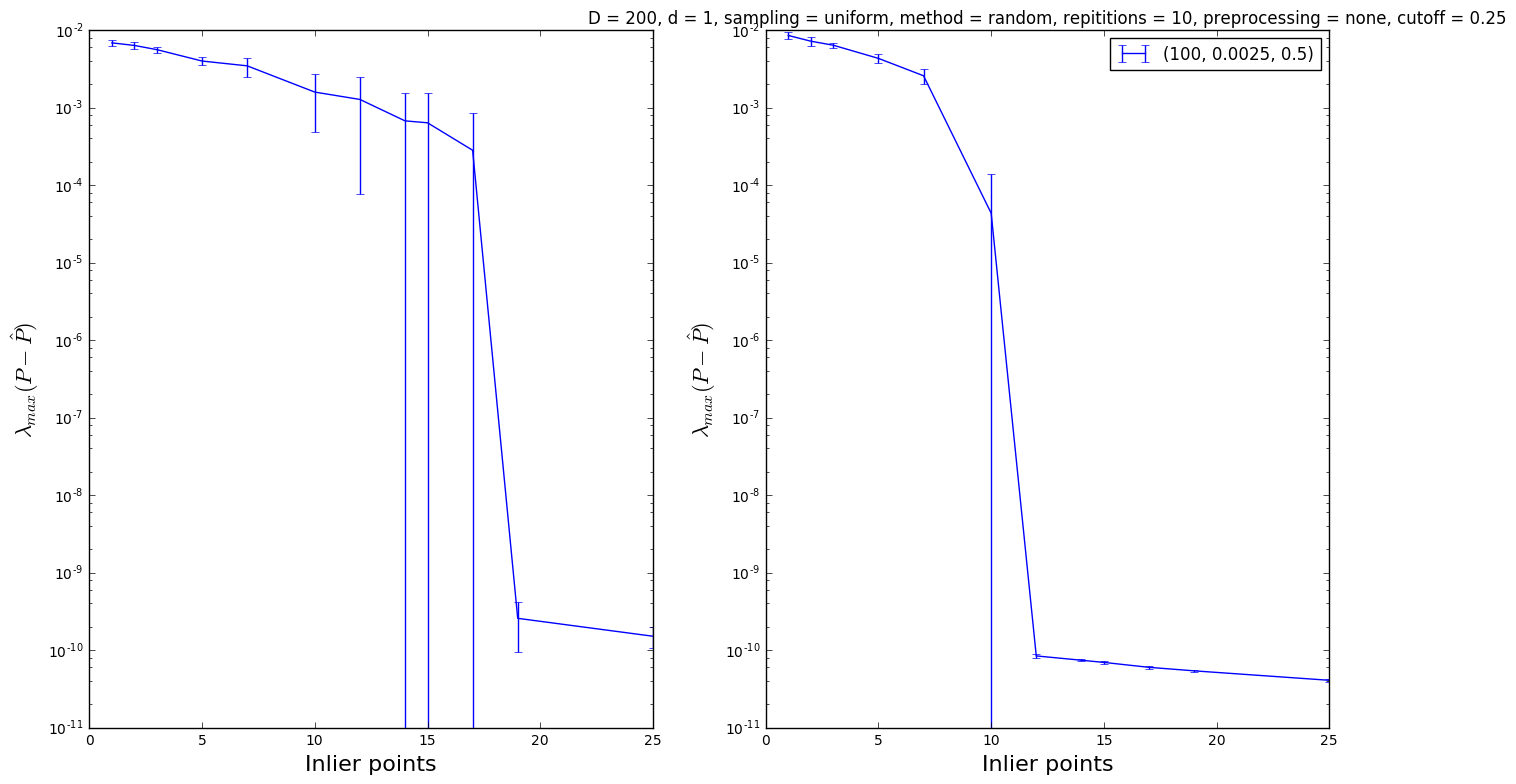

In [10]:
y_index = 0
plot_error(errors_mean_normal[:,:,:,:], errors_std_normal[:,:,:,:],
           errors_mean_spherical[:,:,:,:], errors_std_spherical[:,:,:,:],
           ambient_dim, intrinsic_dim, inlier_points, outlier_points[:],
           outlier_spreads, inlier_spreads, repititions, sampling, method,
           y_index, preprocessing, cutoff)